In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Table of Contents
* [Concat 2013 to 2019 data](#1)
* [Combine all and save the USD only ](#2)
* [Visualize 2013 - 2024 exchange rate data](#3)
* [Microeconomics feature](#4)
    * [Inflation rates](#4_1)
    * [Foreign Direct Investment (FDI)](#4_2)
    * [Map them to forex daily data](#4_3)

### Concat 2013 to 2019 data <a class="anchor" id="1"></a>

In [2]:
def combine_csv_files(directory, output_file, prefix='vcb_rates_2018_', extension='.csv'):
    # List all files in the directory
    all_files = os.listdir(directory)
    
    # Filter files by prefix and extension
    csv_files = [os.path.join(directory, file) for file in all_files if file.startswith(prefix) and file.endswith(extension)]
    
    # Read and concatenate all CSV files
    df_list = [pd.read_csv(file) for file in csv_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df.to_csv(output_file, index=False)

In [3]:
directory = '../crawl/data/vcb'
output_file = '../crawl/data/vcb/full'
for year in range(2013, 2020):
    year_dir = f'{directory}/{year}'
    year_output_file = f'{output_file}/vcb_rates_{year}.csv'
    combine_csv_files(year_dir, year_output_file, prefix=f'vcb_rates_{year}_')

### Combine them all and save the USD only <a class="anchor" id="2"></a>

In [4]:
data_dir = '../crawl/data/vcb/full'
years = range(2013, 2025)

In [5]:
full_df = []
for year in years:
    # Construct the filename by replacing the year
    filename = f'{data_dir}/vcb_rates_{year}.csv'
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    full_df.append(df)

all_data = pd.concat(full_df, ignore_index=True)
all_data.sort_values(by='Date')
all_data

,Date,Currency Name,Currency Code,Buy Cash,Buy Transfer,Sell
0,2013-01-01,AUST.DOLLAR,AUD,21192.26,21325.33,21816.75
1,2013-01-01,CANADIAN DOLLAR,CAD,20470.88,20662.02,21138.94
2,2013-01-01,SWISS FRANCE,CHF,22288.53,22450.83,22966.84
3,2013-01-01,DANISH KRONE,DKK,-,3632.33,3726.57
4,2013-01-01,EURO,EUR,27033.06,27119.48,27737.50
...,...,...,...,...,...,...
78082,2024-05-31,SAUDI RIAL,SAR,-,6764.05,7034.45
78083,2024-05-31,SWEDISH KRONA,SEK,-,2353.38,2453.29
78084,2024-05-31,SINGAPORE DOLLAR,SGD,18368.57,18554.11,19149.29
78085,2024-05-31,THAILAND BAHT,THB,613.02,681.14,707.22


In [6]:
# Keep the USD data only
df_usd = all_data[all_data['Currency Code'] == 'USD'].reset_index(drop=True)
df_usd

,Date,Currency Name,Currency Code,Buy Cash,Buy Transfer,Sell
0,2013-01-01,US DOLLAR,USD,20760.00,20810.0,20860.0
1,2013-01-02,US DOLLAR,USD,20770.00,20820.0,20860.0
2,2013-01-03,US DOLLAR,USD,20770.00,20820.0,20860.0
3,2013-01-04,US DOLLAR,USD,20770.00,20820.0,20860.0
4,2013-01-05,US DOLLAR,USD,20765.00,20815.0,20855.0
...,...,...,...,...,...,...
4157,2024-05-27,US DOLLAR,USD,25251.00,25281.0,25481.0
4158,2024-05-28,US DOLLAR,USD,25238.00,25268.0,25468.0
4159,2024-05-29,US DOLLAR,USD,25235.00,25265.0,25465.0
4160,2024-05-30,US DOLLAR,USD,25220.00,25250.0,25470.0


In [7]:
# Check to see if any duplicate date (crawling error)
duplicates = df_usd['Date'].duplicated(keep=False)
# duplicate_rows = df_usd[duplicates] # Get duplicate rows
print(f"There are {duplicates.sum()} duplicate date")

There are 0 duplicate date


In [8]:
# Check null value
null_values = df_usd.isnull().sum()
print(f"Null values in each column: \n{null_values}")

Null values in each column: 
Date             0
Currency Name    0
Currency Code    0
Buy Cash         0
Buy Transfer     0
Sell             0
dtype: int64


In [9]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4162 non-null   datetime64[ns]
 1   Currency Name  4162 non-null   object        
 2   Currency Code  4162 non-null   object        
 3   Buy Cash       4162 non-null   object        
 4   Buy Transfer   4162 non-null   float64       
 5   Sell           4162 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 195.2+ KB


In [10]:
# Change Buy Cash to float
df_usd['Buy Cash'] = df_usd['Buy Cash'].replace('.00', '').astype(float)
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4162 non-null   datetime64[ns]
 1   Currency Name  4162 non-null   object        
 2   Currency Code  4162 non-null   object        
 3   Buy Cash       4162 non-null   float64       
 4   Buy Transfer   4162 non-null   float64       
 5   Sell           4162 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 195.2+ KB


In [11]:
#Drop unused columns
df_usd.drop(columns=['Currency Name', 'Currency Code'], inplace=True)
df_usd

,Date,Buy Cash,Buy Transfer,Sell
0,2013-01-01,20760.0,20810.0,20860.0
1,2013-01-02,20770.0,20820.0,20860.0
2,2013-01-03,20770.0,20820.0,20860.0
3,2013-01-04,20770.0,20820.0,20860.0
4,2013-01-05,20765.0,20815.0,20855.0
...,...,...,...,...
4157,2024-05-27,25251.0,25281.0,25481.0
4158,2024-05-28,25238.0,25268.0,25468.0
4159,2024-05-29,25235.0,25265.0,25465.0
4160,2024-05-30,25220.0,25250.0,25470.0


In [12]:
# Save for later use
df_usd.sort_values(by='Date').to_csv('../crawl/data/clean/df_usd.csv', index=False)

### Visualize USD exchange rate data <a class="anchor" id="3"></a>

In [13]:
df_usd = pd.read_csv('../crawl/data/clean/df_usd.csv')
# Ensure 'Date' is in datetime format
df_usd['Date'] = pd.to_datetime(df_usd['Date'])

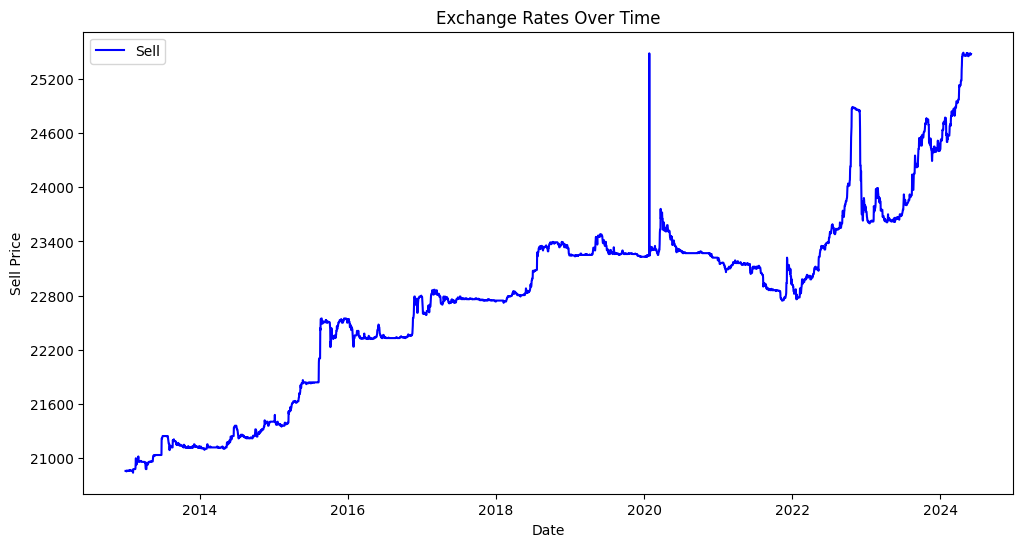

In [14]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_usd['Date'], df_usd['Sell'], label='Sell', color='blue')

# Customize the y-axis to avoid thick lines
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(prune='both'))

plt.xlabel('Date')
plt.ylabel('Sell Price')
plt.title('Exchange Rates Over Time')
plt.legend()
plt.show()

In [15]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4162 non-null   datetime64[ns]
 1   Buy Cash      4162 non-null   float64       
 2   Buy Transfer  4162 non-null   float64       
 3   Sell          4162 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 130.2 KB


### Map microeconomics feature to exchange df <a class="anchor" id="4"></a>
- Inflation rates data is record monthly (both VN and USA)
- Foreign Direct Investment (FDI) data is monthly in VN and quarterly in USA &#8594; Calculate VN data to quarterly 

**1. Inflation rates <a class="anchor" id="4_1"></a>**

In [16]:
df_inflation = pd.read_csv('../crawl/data/trading_economics/inflation_rate_month.csv')
df_inflation['Date'] = pd.to_datetime(df_inflation['month'], format='%d-%m-%y')
df_inflation

,month,inflation_rate_vn,inflation_rate_us,Date
0,01-01-13,0.0707,0.0160,2013-01-01
1,01-02-13,0.0702,0.0200,2013-02-01
2,01-03-13,0.0664,0.0150,2013-03-01
3,01-04-13,0.0661,0.0110,2013-04-01
4,01-05-13,0.0636,0.0140,2013-05-01
...,...,...,...,...
132,01-01-24,0.0337,0.0310,2024-01-01
133,01-02-24,0.0398,0.0320,2024-02-01
134,01-03-24,0.0397,0.0348,2024-03-01
135,01-04-24,0.0440,0.0340,2024-04-01


In [17]:
# Forward-fill monthly data to daily frequency
df_inflation_daily = df_inflation.set_index('Date').resample('D').ffill().reset_index()
df_inflation_daily.drop(columns=['month'], inplace=True)
df_inflation_daily

,Date,inflation_rate_vn,inflation_rate_us
0,2013-01-01,0.0707,0.016
1,2013-01-02,0.0707,0.016
2,2013-01-03,0.0707,0.016
3,2013-01-04,0.0707,0.016
4,2013-01-05,0.0707,0.016
...,...,...,...
4134,2024-04-27,0.0440,0.034
4135,2024-04-28,0.0440,0.034
4136,2024-04-29,0.0440,0.034
4137,2024-04-30,0.0440,0.034


**2. Foreign Direct Investment (FDI) <a class="anchor" id="4_2"></a>**

In [18]:
df_us_fdi = pd.read_csv('../crawl/data/trading_economics/usa_fdi_quarter.csv')
df_us_fdi['Date'] = pd.to_datetime(df_us_fdi['month'], format='%d-%m-%y')
df_us_fdi.drop(columns=['month'], inplace=True)

df_vn_fdi = pd.read_csv('../crawl/data/trading_economics/vn_fdi_month.csv')
df_vn_fdi['Date'] = pd.to_datetime(df_vn_fdi['month'], format='%d-%m-%y')
df_vn_fdi.drop(columns=['month'], inplace=True)

df_vn_fdi

,fdi_vn,Date
0,0.42,2013-01-01
1,1.05,2013-02-01
2,2.70,2013-03-01
3,3.75,2013-04-01
4,4.58,2013-05-01
...,...,...
128,15.91,2023-09-01
129,18.00,2023-10-01
130,20.25,2023-11-01
131,23.18,2023-12-01


In [19]:
# Aggregate monthly data to quarterly frequency
df_fdi_monthly_quarterly = df_vn_fdi.set_index('Date').resample('QE').mean().reset_index()
df_fdi_monthly_quarterly['Date'] = df_fdi_monthly_quarterly['Date'].dt.to_period('Q').dt.start_time
df_fdi_monthly_quarterly

,Date,fdi_vn
0,2013-01-01,1.390000
1,2013-04-01,4.676667
2,2013-07-01,7.626667
3,2013-10-01,10.560000
4,2014-01-01,1.480000
5,2014-04-01,4.783333
6,2014-07-01,7.866667
7,2014-10-01,11.266667
8,2015-01-01,1.586667
9,2015-04-01,5.150000


In [20]:
# Merge the DataFrames for plotting
df_fdi_combine = pd.merge(df_fdi_monthly_quarterly, df_us_fdi, on='Date', how='outer', suffixes=('_usa', '_vn'))
df_fdi_combine.to_csv('../crawl/data/trading_economics/df_fdi_quarter.csv', index=False)
df_fdi_combine

,Date,fdi_vn,fdi_us
0,2013-01-01,1.390000,40.6
1,2013-04-01,4.676667,42.8
2,2013-07-01,7.626667,41.8
3,2013-10-01,10.560000,43.1
4,2014-01-01,1.480000,39.0
5,2014-04-01,4.783333,45.7
6,2014-07-01,7.866667,45.2
7,2014-10-01,11.266667,47.5
8,2015-01-01,1.586667,34.6
9,2015-04-01,5.150000,42.7


In [21]:
# Forward-fill quarterly data to daily frequency
df_fdi_daily = df_fdi_combine.set_index('Date').resample('D').ffill().reset_index()
df_fdi_daily

,Date,fdi_vn,fdi_us
0,2013-01-01,1.390000,40.6
1,2013-01-02,1.390000,40.6
2,2013-01-03,1.390000,40.6
3,2013-01-04,1.390000,40.6
4,2013-01-05,1.390000,40.6
...,...,...,...
4013,2023-12-28,20.476667,66.4
4014,2023-12-29,20.476667,66.4
4015,2023-12-30,20.476667,66.4
4016,2023-12-31,20.476667,66.4


**3. Combine them all to the daily forex <a class="anchor" id="4_3"></a>**

In [22]:
# Merge daily exchange rate data with monthly and quarterly daily data
df_combined = df_usd.merge(df_inflation_daily, on='Date', how='left')
df_combined = df_combined.merge(df_fdi_daily, on='Date', how='left')
df_combined

,Date,Buy Cash,Buy Transfer,Sell,inflation_rate_vn,inflation_rate_us,fdi_vn,fdi_us
0,2013-01-01,20760.0,20810.0,20860.0,0.0707,0.016,1.39,40.6
1,2013-01-02,20770.0,20820.0,20860.0,0.0707,0.016,1.39,40.6
2,2013-01-03,20770.0,20820.0,20860.0,0.0707,0.016,1.39,40.6
3,2013-01-04,20770.0,20820.0,20860.0,0.0707,0.016,1.39,40.6
4,2013-01-05,20765.0,20815.0,20855.0,0.0707,0.016,1.39,40.6
...,...,...,...,...,...,...,...,...
4157,2024-05-27,25251.0,25281.0,25481.0,NaN,NaN,NaN,NaN
4158,2024-05-28,25238.0,25268.0,25468.0,NaN,NaN,NaN,NaN
4159,2024-05-29,25235.0,25265.0,25465.0,NaN,NaN,NaN,NaN
4160,2024-05-30,25220.0,25250.0,25470.0,NaN,NaN,NaN,NaN


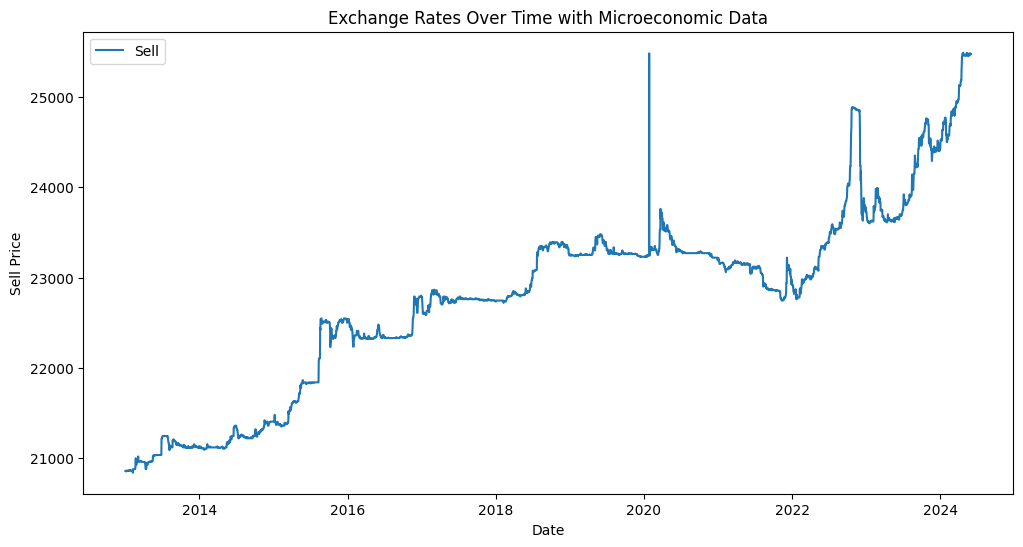

In [23]:
# Plotting the combined data
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Date'], df_combined['Sell'], label='Sell')
plt.xlabel('Date')
plt.ylabel('Sell Price')
plt.title('Exchange Rates Over Time with Microeconomic Data')
plt.legend()
plt.show()

In [26]:
end_idx = df_combined.index[df_combined['Date'] >= pd.to_datetime('2024-01-01')][0]
df_combined = df_combined.iloc[:end_idx]
df_combined

,Date,Buy Cash,Buy Transfer,Sell,inflation_rate_vn,inflation_rate_us,fdi_vn,fdi_us
0,2013-01-01,20760.0,20810.0,20860.0,0.0707,0.016,1.390000,40.6
1,2013-01-02,20770.0,20820.0,20860.0,0.0707,0.016,1.390000,40.6
2,2013-01-03,20770.0,20820.0,20860.0,0.0707,0.016,1.390000,40.6
3,2013-01-04,20770.0,20820.0,20860.0,0.0707,0.016,1.390000,40.6
4,2013-01-05,20765.0,20815.0,20855.0,0.0707,0.016,1.390000,40.6
...,...,...,...,...,...,...,...,...
4005,2023-12-27,24110.0,24140.0,24480.0,0.0358,0.034,20.476667,66.4
4006,2023-12-28,24030.0,24060.0,24400.0,0.0358,0.034,20.476667,66.4
4007,2023-12-29,24050.0,24080.0,24420.0,0.0358,0.034,20.476667,66.4
4008,2023-12-30,24050.0,24080.0,24420.0,0.0358,0.034,20.476667,66.4


In [28]:
df_combined.sort_values(by='Date').to_csv('../crawl/data/clean/df_combine.csv', index=False)